## import libraries

In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## set path

In [4]:
datadir = '/Users/alexbarnett/Documents/Community_detection/hippo_nets/'

## load data

In [6]:
hippo_con = pd.read_excel(datadir+'hippo_net_con.xlsx')

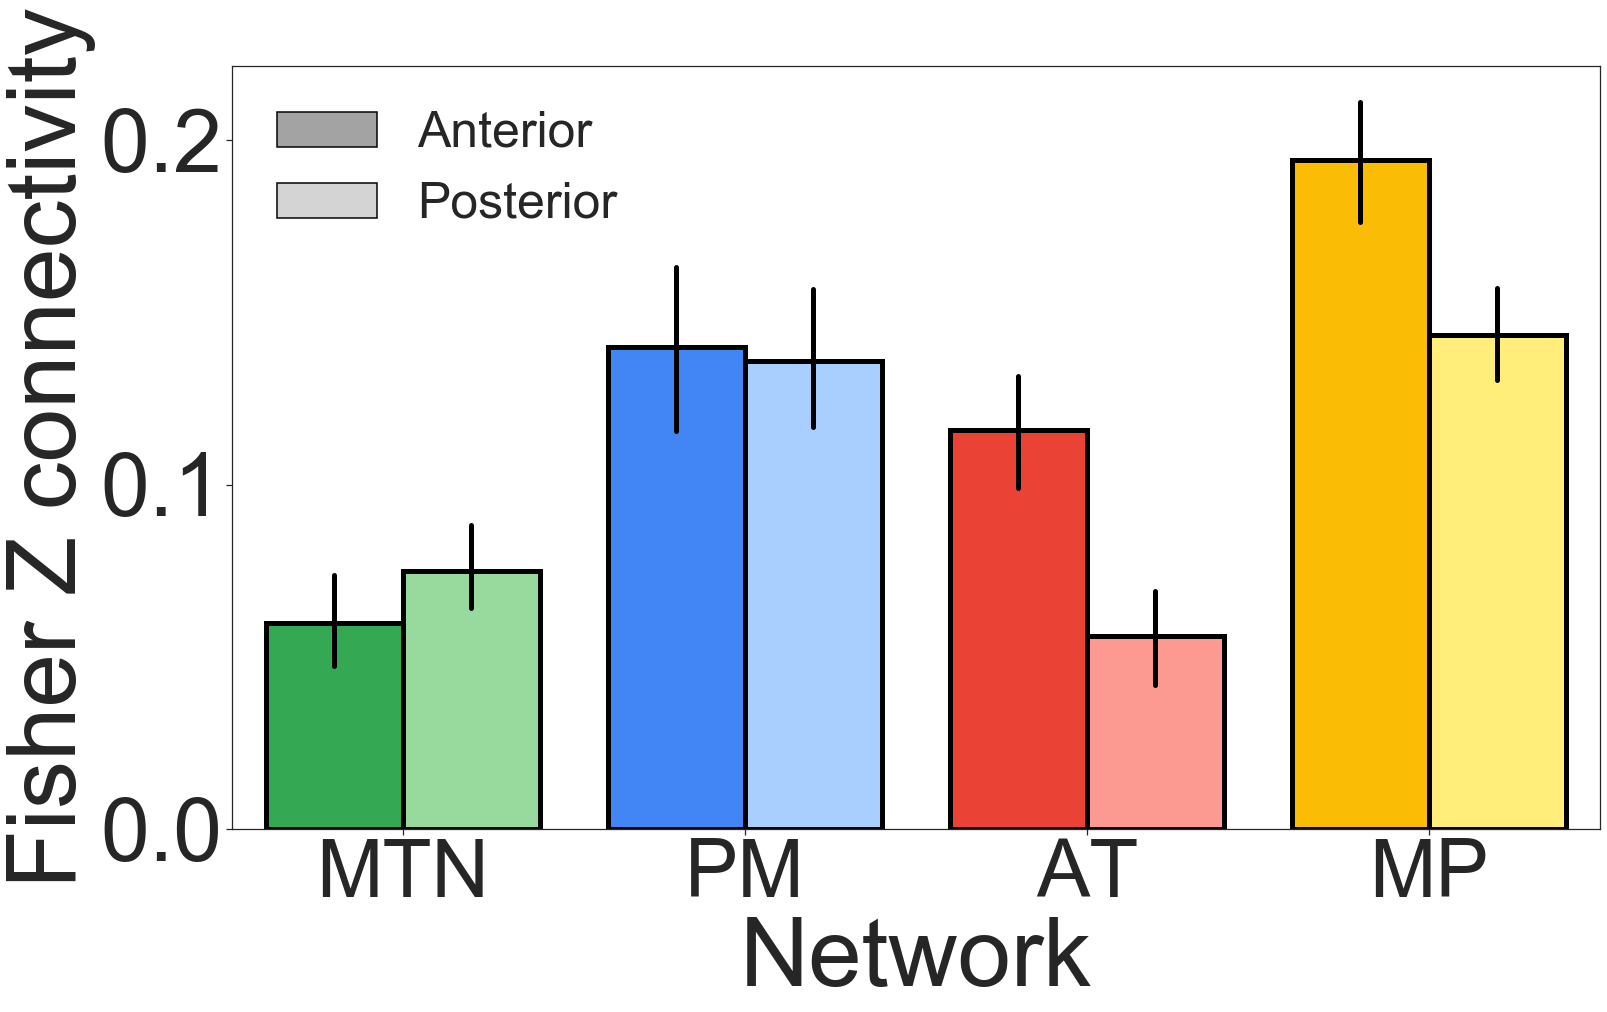

In [7]:
sns.set(rc={'figure.figsize':(25,16)},font_scale=8)
sns.set_style("ticks")
# Create an array with the colors you want to use
colors = ["#a3a3a3", "#d4d4d4"]
#colors = ['#34A853','#34A853','#4285F4','#4285F4','#EA4335','#EA4335','#FBBC05','#FBBC05']
#colors = ['#34A853','#4285F4','#EA4335','#FBBC05']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

labels = ["MTN","PM","AT","MP"]



plot_hippo_con = sns.barplot(y = "z", x="network",hue="longaxis",  data = hippo_con, edgecolor = "black",
                             errcolor = "black", linewidth = 1.5, order=["Context","DMN1","DMN2","DMN3"],errwidth=5)

plot_hippo_con.set_xticklabels(labels, fontsize = 80)
plot_hippo_con.set(xlabel="Network", ylabel="Fisher Z connectivity")
plot_hippo_con.legend( loc=2, fontsize = 50,edgecolor="white")
fig = plot_hippo_con.get_figure()
fig.tight_layout(h_pad = 0)


#['#34A853','#4285F4','#EA4335','#FBBC05','#5cd07b','#6aadff','#ff6b5d','#ffe52d']

colors = itertools.cycle(['#34A853','#4285F4','#EA4335','#FBBC05','#98d99e','#a8cfff','#fc9990','#ffef7a'])
edge_colors = itertools.cycle(['#363636','#363636','#363636','#363636','#999999','#999999','#999999','#999999'])
line_style = itertools.cycle(['solid','solid','solid','solid','dashed','dashed','dashed','dashed'])
for i, bar in enumerate(plot_hippo_con.patches):
    color = next(colors)
    edge_color = next(edge_colors)
    linestyle = next(line_style)
    bar.set_color(color)
    bar.set_edgecolor('black')
    bar.set_linestyle('solid')
    bar.set_linewidth(5)

fig.savefig(datadir+"antpostconn.pdf",dpi=300)


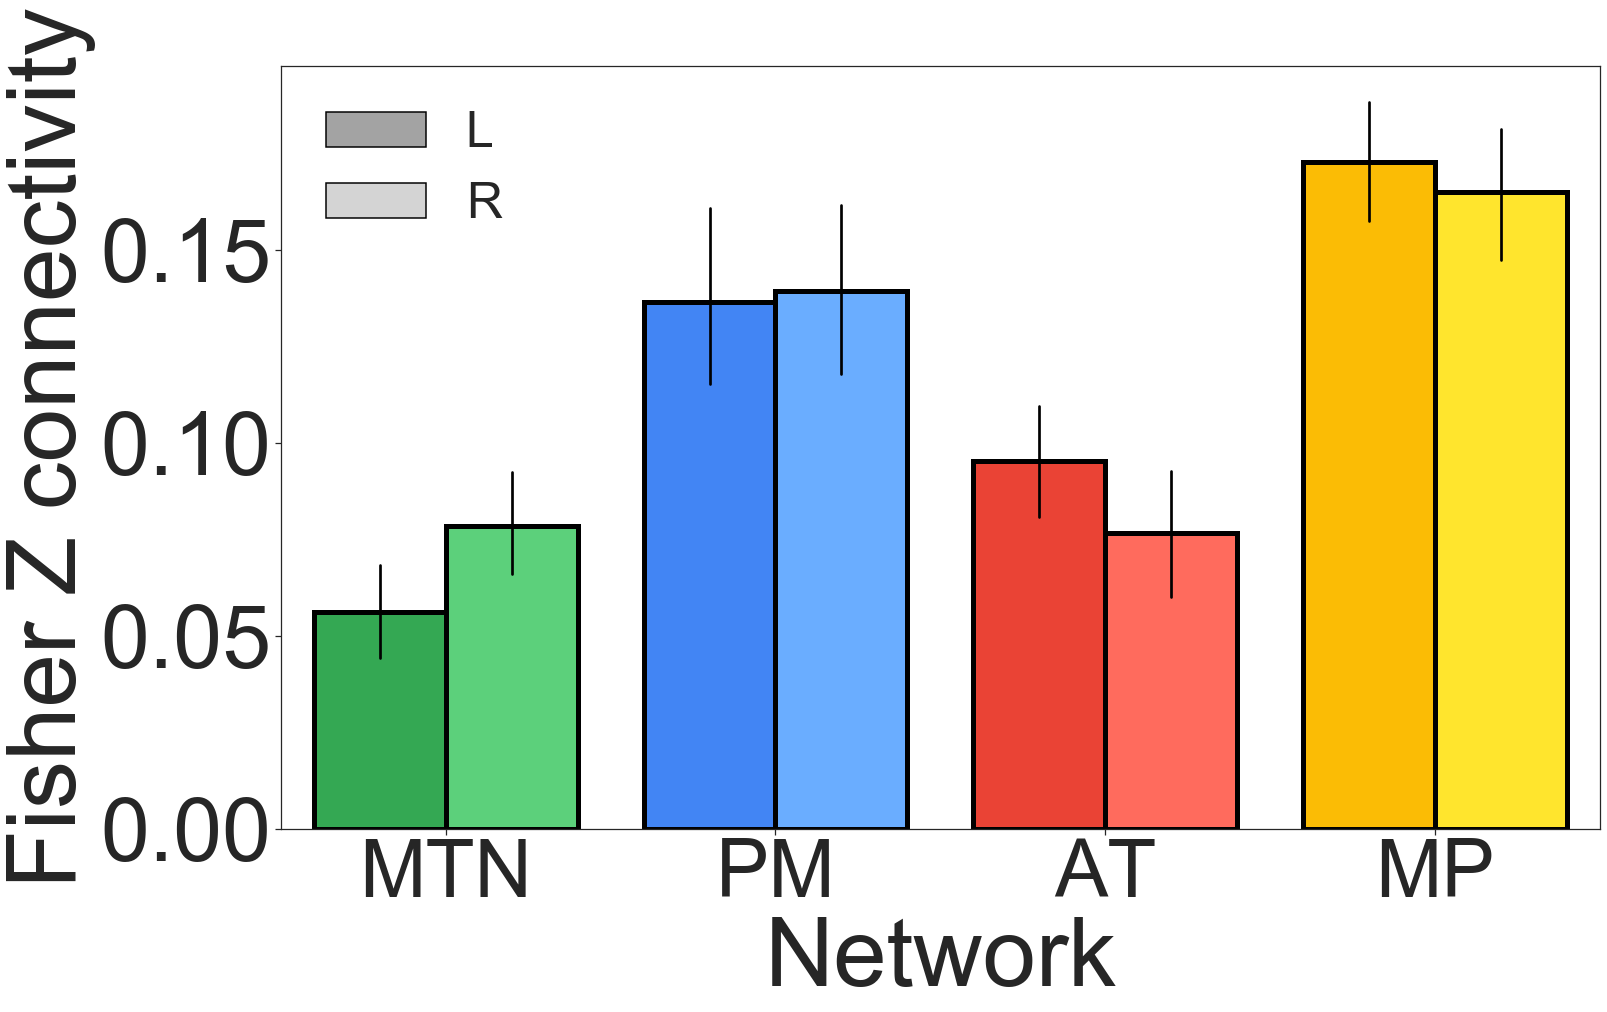

In [12]:
sns.set(rc={'figure.figsize':(25,16)},font_scale=8)
sns.set_style("ticks")
# Create an array with the colors you want to use
colors = ["#a3a3a3", "#d4d4d4"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

labels = ["MTN","PM","AT","MP"]



plot_hippo_con = sns.barplot(y = "z", x="network",hue="hemi",  data = hippo_con, edgecolor = "black",
                             errcolor = "black", linewidth = 1.5, order=["Context","DMN1","DMN2","DMN3"])

plot_hippo_con.set_xticklabels(labels, fontsize = 80)
plot_hippo_con.set(xlabel="Network", ylabel="Fisher Z connectivity")
plot_hippo_con.legend( loc=2, fontsize = 50,edgecolor="white")
fig = plot_hippo_con.get_figure()
fig.tight_layout(h_pad = 0)


colors = itertools.cycle(['#34A853','#4285F4','#EA4335','#FBBC05','#5cd07b','#6aadff','#ff6b5d','#ffe52d'])
edge_colors = itertools.cycle(['#363636','#363636','#363636','#363636','#999999','#999999','#999999','#999999'])
line_style = itertools.cycle(['solid','solid','solid','solid','dashed','dashed','dashed','dashed'])
for i, bar in enumerate(plot_hippo_con.patches):
    color = next(colors)
    edge_color = next(edge_colors)
    linestyle = next(line_style)
    bar.set_color(color)
    bar.set_edgecolor('black')
    bar.set_linestyle('solid')
    bar.set_linewidth(5)

fig.savefig(datadir+"hemi_hippo_conn.png",dpi=300)


In [17]:
#MTN within subject statsitics

context_data = hippo_con[hippo_con['network']=="Context"]

md = smf.mixedlm("z~longaxis+hemi",context_data, groups=context_data["subjid"])
mdf=md.fit()
print(mdf.summary())
print(mdf.tvalues)
print(mdf.pvalues)

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   z       
No. Observations:     160       Method:               REML    
No. Groups:           40        Scale:                0.0014  
Min. group size:      4         Log-Likelihood:       250.6181
Max. group size:      4         Converged:            Yes     
Mean group size:      4.0                                     
--------------------------------------------------------------
                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept             0.049    0.009 5.599 0.000  0.032  0.066
longaxis[T.Posterior] 0.015    0.006 2.577 0.010  0.004  0.027
hemi[T.R]             0.022    0.006 3.795 0.000  0.011  0.034
Group Var             0.002    0.016                          

Intercept                5.599275
longaxis[T.Posterior]    2.576562
hemi[T.R]                3.794885
Group Var                3.2

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [19]:
# AT within subject statistics

DMN2_data = hippo_con[hippo_con['network']=="DMN2"]

md = smf.mixedlm("z~longaxis+hemi",DMN2_data, groups=DMN2_data["subjid"])
mdf=md.fit()
print(mdf.summary())
print(mdf.tvalues)
print(mdf.pvalues)

             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    z       
No. Observations:     160        Method:                REML    
No. Groups:           40         Scale:                 0.0021  
Min. group size:      4          Log-Likelihood:        223.1952
Max. group size:      4          Converged:             Yes     
Mean group size:      4.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.125    0.010 13.045 0.000  0.106  0.144
longaxis[T.Posterior] -0.060    0.007 -8.211 0.000 -0.074 -0.045
hemi[T.R]             -0.019    0.007 -2.590 0.010 -0.033 -0.005
Group Var              0.002    0.015                           

Intercept                13.044814
longaxis[T.Posterior]    -8.210872
hemi[T.R]                -2.58977

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [20]:
# MP within subject statistics

DMN3_data = hippo_con[hippo_con['network']=="DMN3"]

md = smf.mixedlm("z~longaxis+hemi",DMN3_data, groups=DMN3_data["subjid"])
mdf=md.fit()
print(mdf.summary())
print(mdf.tvalues)
print(mdf.pvalues)

             Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    z       
No. Observations:     160        Method:                REML    
No. Groups:           40         Scale:                 0.0025  
Min. group size:      4          Log-Likelihood:        209.1909
Max. group size:      4          Converged:             Yes     
Mean group size:      4.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.198    0.011 18.377 0.000  0.177  0.219
longaxis[T.Posterior] -0.051    0.008 -6.472 0.000 -0.066 -0.035
hemi[T.R]             -0.008    0.008 -0.978 0.328 -0.023  0.008
Group Var              0.003    0.018                           

Intercept                18.376767
longaxis[T.Posterior]    -6.472135
hemi[T.R]                -0.97849

/Users/alexbarnett/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
